In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys, os
sys.path.append(os.environ['raco'])
#sys.path.append(os.environ['raco'] + '/reference_state')
from common import *
#from polytrope import *
f = open("Model_S.pkl", "rb")
di = dotdict(pickle.load(f))
f.close()

In [2]:
from common import *

In [3]:
sun

{'r': 69570000000.0,
 'l': 3.846e+33,
 'm': 1.98891e+33,
 'c_p': 350000000.0,
 'gas_constant': 140000000.0,
 'rho_bcz': 0.18053428,
 'tmp_bcz': 2111256.4,
 'r_bcz': 50000000000.0,
 'rbcz': 50000000000.0,
 'rbcz_nond': 0.7187005893344832,
 'r_nrho3': 65860209000.0}

In [4]:
rtop = 6.5860209e10
# default is three density scale heights
poly_n1 = compute_polytrope(poly_nrho=1)
poly_n2 = compute_polytrope(poly_nrho=2)
poly_n3 = compute_polytrope(poly_nrho=3)
poly_n4 = compute_polytrope(poly_nrho=4)
poly_n4.keys()

dict_keys(['rr', 'rho', 'prs', 'tmp', 'grav', 'dlnrho', 'd2lnrho', 'dlntmp', 'dsdr'])

<IPython.core.display.Javascript object>


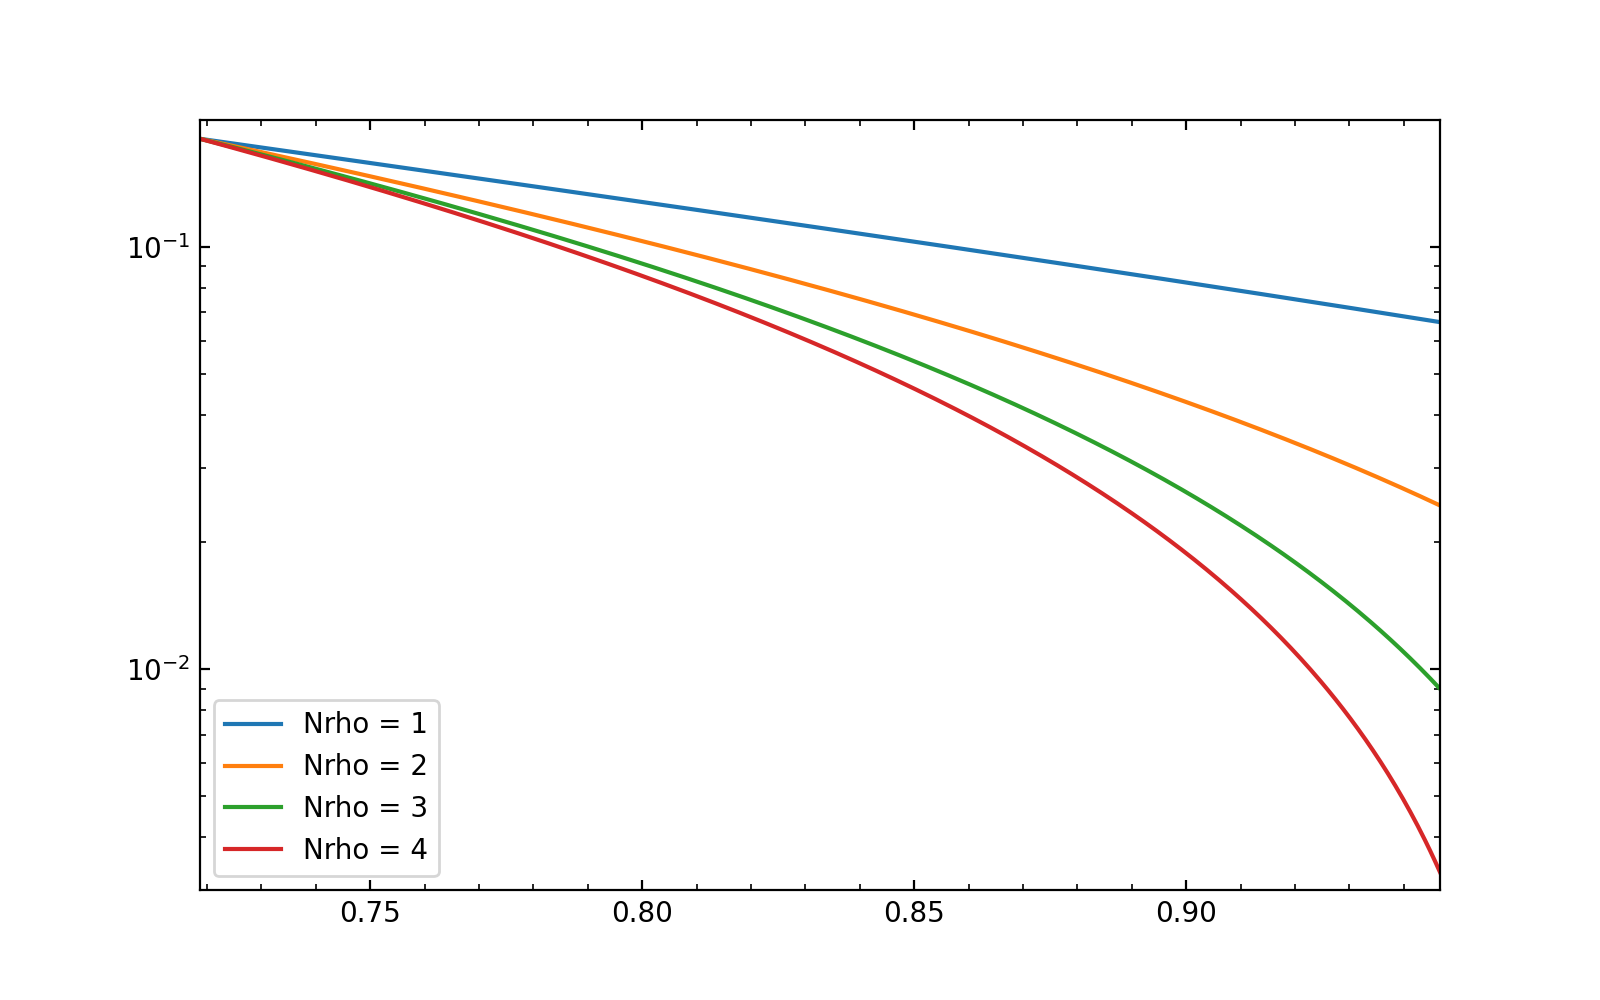

In [5]:
# plot density make sure it's like FH2016, Fig. 1a
plt.figure(figsize = (8,5))
rr = poly_n1['rr']
rho1 = poly_n1['rho']
rho2 = poly_n2['rho']
rho3 = poly_n3['rho']
rho4 = poly_n4['rho']

plt.plot(rr/rsun, rho1, label='Nrho = 1')
plt.plot(rr/rsun, rho2, label='Nrho = 2')
plt.plot(rr/rsun, rho3, label='Nrho = 3')
plt.plot(rr/rsun, rho4, label='Nrho = 4')
plt.yscale('log')
plt.minorticks_on()
plt.tick_params(top=True, right=True, direction='in', which='both')
plt.xlim(np.min(rr)/rsun, np.max(rr)/rsun)
plt.ylim(3e-3, 0.2)
plt.legend()

<IPython.core.display.Javascript object>


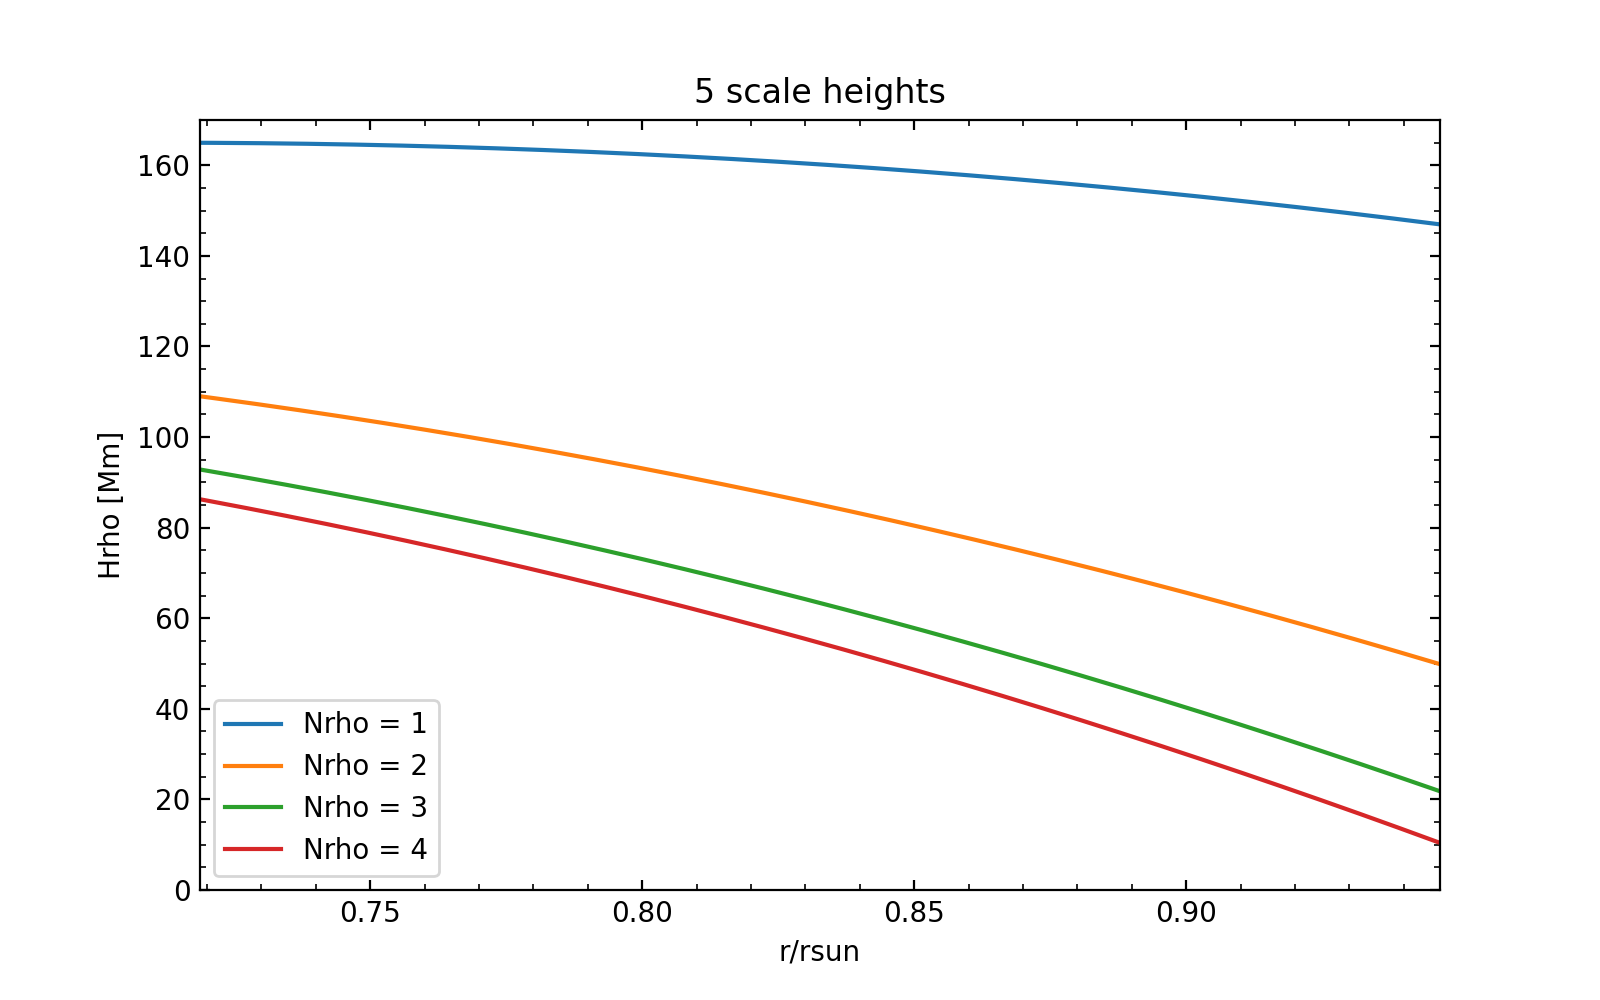

In [6]:
# Okay I'm convinced now look at top scale heights


# plot density make sure it's like FH2016, Fig. 1a
plt.figure(figsize = (8,5))
rr = poly_n1['rr']
hrho1 = -1/poly_n1['dlnrho']
hrho2 = -1/poly_n2['dlnrho']
hrho3 = -1/poly_n3['dlnrho']
hrho4 = -1/poly_n4['dlnrho']

plt.plot(rr/rsun, hrho1/1e8, label='Nrho = 1')
plt.plot(rr/rsun, hrho2/1e8, label='Nrho = 2')
plt.plot(rr/rsun, hrho3/1e8, label='Nrho = 3')
plt.plot(rr/rsun, hrho4/1e8, label='Nrho = 4')
#plt.yscale('log')
plt.minorticks_on()
plt.tick_params(top=True, right=True, direction='in', which='both')
plt.xlim(np.min(rr)/rsun, np.max(rr)/rsun)
#plt.ylim(3e-3, 0.2)
plt.xlabel('r/rsun')
plt.ylabel('Hrho [Mm]')
plt.ylim(0,170)
plt.legend()

In [7]:
# bottom to top scale height ratios
print ("hrho_bot / hrho_top, Nrho=1: %.2f" %(hrho1[-1]/hrho1[0]))
print ("hrho_bot / hrho_top, Nrho=2: %.2f" %(hrho2[-1]/hrho2[0]))
print ("hrho_bot / hrho_top, Nrho=3: %.2f" %(hrho3[-1]/hrho3[0]))
print ("hrho_bot / hrho_top, Nrho=4: %.2f" %(hrho4[-1]/hrho4[0]))

hrho_bot / hrho_top, Nrho=1: 1.12
hrho_bot / hrho_top, Nrho=2: 2.19
hrho_bot / hrho_top, Nrho=3: 4.26
hrho_bot / hrho_top, Nrho=4: 8.29


In [8]:
# 
rtop_boulder = 6.83177e10

# calculate rtop model S
di.keys()

dict_keys(['msun', 'rsun', 'lsun', 'zsun', 'x0sun', 'alphasun', 'agesun', 'rr', 'lnq', 'grav', 'tmp', 'prs', 'rho', 'xfrac', 'lum', 'opa', 'eps', 'gamma', 'gamma_ad', 'delta', 'c_p', 'mue', 'ne', 'dsdr', 'nsq', 'zfrac', 'Ne', 'nu', 'kappa', 'eta', 'prm', 'pr', 'drhodr', 'dtmpdr', 'dprsdr', 'dlnrho', 'dlntmp', 'dlnprs', 'gas_constant', 'ircut', 'rcut', 'irbcz', 'rbcz', 'frad', 'heat', 'rtach', 'dtach', 'irtach', 'irtach1', 'irtach2', 'rtach1', 'rtach2', 'rrrz', 'nr', 'nrrz', 'reta', 'etaconst', 'iretaconst', 'retaconst'])

In [9]:
rr_S = di['rr']
rho_S = di['rho']
rbcz_S = di['rbcz']
irbcz = np.argmin(np.abs(rr_S - rbcz_S))
Nrho = np.log(rho_S[irbcz]/rho_S)
irtop_S = np.argmin(np.abs(Nrho - 5))
rtop_S = rr_S[irtop_S]
rho_S[irbcz]/rho_S[irtop_S]

print("rbcz_S, rtop_S: %1.3e, %1.3e" %(rbcz_S, rtop_S))
print("rbcz_boulder, rtop_boulder: %1.3e, %1.3e" %(5e10, rtop_boulder))

rbcz_S, rtop_S: 4.961e+10, 6.829e+10
rbcz_boulder, rtop_boulder: 5.000e+10, 6.832e+10


In [10]:
# pretty damn close but lets use model_S values for consistency
aspect = rbcz_S/rtop_S
aspect

0.7264255627221896

<IPython.core.display.Javascript object>


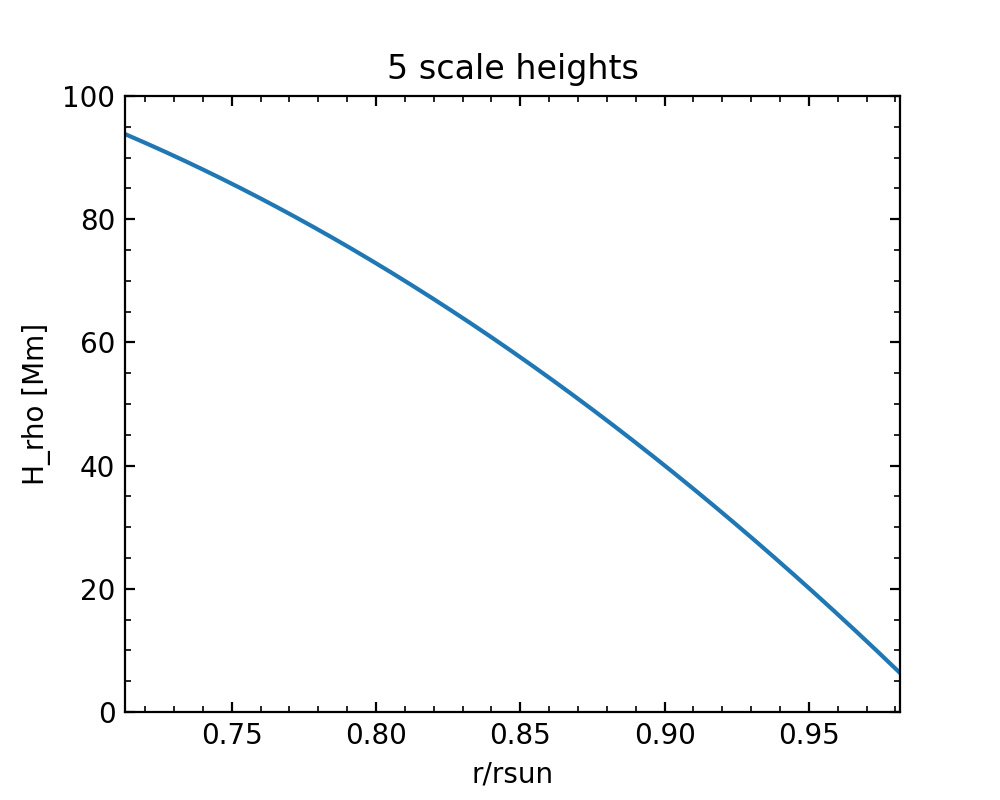

Text(0.5, 1.0, '5 scale heights')

In [21]:
poly_n5 = compute_polytrope(poly_nrho=5, rmin=rbcz_S, rmax=rtop_S)
hrho5 = -1/poly_n5['dlnrho']

plt.figure(figsize=(5,4))
plt.plot(poly_n5.rr/rsun, hrho5/1e8)
plt.xlabel('r/rsun')
plt.ylabel('H_rho [Mm]')
plt.minorticks_on()
plt.tick_params(top=True, right=True, direction='in', which='both')
plt.xlim(rbcz_S/rsun, rtop_S/rsun)
plt.ylim(0, 100)
plt.title('5 scale heights')

In [22]:
hrho5[-1]/hrho5[0]

14.79212301913193

In [31]:
cdepth_ratio = 0.3
ngranules_est = np.pi*rtop_S/hrho5[0]
ntheta_est = ngranules_est/cdepth_ratio*3
shell_depth = rtop_S - rbcz_S
nr_est = shell_depth/hrho5[0]/cdepth_ratio*5
print("cdepth_ratio = ", cdepth_ratio)
print("ngranules = ", ngranules_est)
print("nr = ", nr_est)
print("ntheta = ", ntheta_est)

cdepth_ratio =  0.3
ngranules =  338.2430548286601
nr =  490.91158313253413
ntheta =  3382.430548286601


In [33]:
hrho5[0]/1e8

6.34258663267147

In [34]:
shell_depth/1e8

186.8189547

In [35]:
hrho5[0]/1e8*0.3

1.902775989801441

In [37]:
400/1.9*3, 200/1.9*5

(1052.6315789473686, 526.3157894736843)

In [38]:
hrho4[0]/1e8

10.3998727998999

In [39]:
(10.4/6.3)**3

4.4986102612708825

In [40]:
hrho4[-1]/1e8

86.26615581211003

In [41]:
hrho5[-1]/1e8

93.82032172997812